In [6]:
%matplotlib inline
import matplotlib.pyplot


from cobra.io import load_model
from cobra.sampling import sample
from cobra import Reaction, Metabolite, Model
from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba





model = load_model("iMM904")
s = sample(model, 100)
s.head()

,CITtcp,13BGH,13BGHe,13GS,16GS,23CAPPD,2DDA7Ptm,2DHPtm,2DOXG6PP,2HBO,...,PYAM5PO,PYDAMK,PYDXK,PYDXNK,PYDXNO,PYDXO,PYK,PYNP2r,PYR5CDm,PYRDC
0,4.084949e-15,0.001073,0.0,0.001230,0.0,0.0,-0.002549,0.000004,0.0,-0.028598,...,-9.897874e-13,0.0,1.230983e-12,-2.411954e-13,2.411954e-13,-9.838384e-13,16.541099,0.000222,0.000558,15.705349
1,1.512022e-15,0.000971,0.0,0.003887,0.0,0.0,-0.010389,0.000006,0.0,-0.028497,...,-1.008179e-12,0.0,1.159587e-12,-1.514075e-13,1.514075e-13,-1.002797e-12,16.365681,0.000216,0.025302,15.405432
2,5.964082e-15,0.096124,0.0,0.096967,0.0,0.0,-0.011112,0.000021,0.0,-0.002262,...,3.738402e-13,0.0,1.764402e-14,-3.914843e-13,3.914843e-13,3.771149e-13,15.506587,0.000410,0.027321,14.199704
3,5.813527e-15,0.095399,0.0,0.098132,0.0,0.0,-0.011678,0.000021,0.0,-0.008157,...,4.155424e-13,0.0,4.795506e-13,-8.950931e-13,8.950930e-13,8.386941e-13,15.912771,0.000409,0.004708,14.420717
4,1.156859e-15,3.678232,0.0,3.685650,0.0,0.0,-0.006250,0.000020,0.0,-0.092482,...,-1.817418e-12,0.0,2.669324e-12,-8.519059e-13,8.519058e-13,-7.049746e-14,17.595118,0.003893,0.003503,15.937862


In [3]:
s.tail()

,CITtcp,13BGH,13BGHe,13GS,16GS,23CAPPD,2DDA7Ptm,2DHPtm,2DOXG6PP,2HBO,...,PYAM5PO,PYDAMK,PYDXK,PYDXNK,PYDXNO,PYDXO,PYK,PYNP2r,PYR5CDm,PYRDC
95,4.655207e-15,0.088965,0.0,0.091642,0.0,0.0,-0.029911,0.000782,0.0,-0.344220,...,1.760584e-11,0.0,4.241992e-12,-2.184783e-11,2.184783e-11,1.775719e-11,16.990084,0.073695,0.013948,10.961315
96,4.497429e-15,0.062285,0.0,0.065037,0.0,0.0,-0.002622,0.000775,0.0,-0.107892,...,1.807052e-11,0.0,3.607984e-12,-2.167850e-11,2.167850e-11,1.827158e-11,16.942854,0.073062,0.022294,11.297203
97,2.313130e-15,0.014948,0.0,0.018123,0.0,0.0,-0.017482,0.000724,0.0,-0.086192,...,1.843518e-11,0.0,3.745354e-12,-2.218054e-11,2.218054e-11,1.862688e-11,16.248084,0.074710,0.013228,11.092266
98,1.217136e-15,0.014936,0.0,0.017533,0.0,0.0,-0.029038,0.000718,0.0,-0.002538,...,1.831223e-11,0.0,4.036336e-12,-2.234856e-11,2.234856e-11,1.848605e-11,16.587229,0.074127,0.022021,11.449102
99,4.590268e-16,0.348783,0.0,0.351566,0.0,0.0,-0.018333,0.000661,0.0,-0.084600,...,-2.747459e-12,0.0,4.134460e-12,-1.387001e-12,1.387000e-12,-2.476066e-12,16.898079,0.073071,0.017516,11.505906


In [9]:
s_cerevisiae = load_model('iMM904')
nominal = s_cerevisiae.optimize()
loopless = loopless_solution(s_cerevisiae)

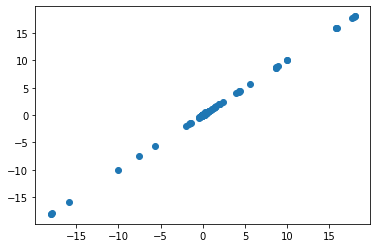

In [10]:
import pandas
df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))

matplotlib.pyplot.plot("loopless", "nominal", data=df, linestyle='none', marker='o')
matplotlib.pyplot.show()